<h1 style="font-size: 70px;text-align: center; font-family:Copperplate; color: darkblue">Fake News Detection</h1>


<!-- # EDA -->
<div style = "height: 50px;
  width: 800px;
  background-color: darkblue;">
    <h1 style="padding: 10px;
              color:white;">
        <b>Introduction</b>
    </h1>

</div>

Naan Mudhalvan AI Fake News Detection Project.

<p style="font-size:30px; font-family:Papyrus"><b>Why should you care about whether or not your news is real or fake?</b></p>

<p style="font-family:Times New Roman ;font-size:20px">The spread of fake news has become easier in the digital age, as social media platforms and other online channels allow anyone to create and share content with the world. The problem with fake news is that it can be very convincing, and people may believe it to be true without questioning its authenticity. This can lead to a range of negative consequences, That is why a sophisticated method is required to identify fake news</p>

<h1 style="font-family:Papyrus">Notebook Overview:</h1>
<ol>
    <li><p style="font-family:Times New Roman ;font-size:20px">An extensive EDA of data present in different news articles</p></li>
    <li><p style="font-family:Times New Roman ;font-size:20px">The Goal of This notebook is to use Machine Learning to Detect Fake News</p></li>
</ol>

In [ ]:
%%capture

!mkdir /content/drive/MyDrive/AI_Experiments/FakeNewsDetectionAIProject
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!pip install kaggle
import os
os.chdir("/content/drive/MyDrive/AI_Experiments/FakeNewsDetectionAIProject/")
!kaggle datasets download -d saurabhshahane/fake-news-classification
!unzip fake-news-classification.zip

In [ ]:
import os
os.chdir("/content/drive/MyDrive/AI_Experiments/FakeNewsDetectionAIProject/")


<!-- # EDA -->
<div id = "eda" style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>1.EDA</b>
    </h1>

</div>

In [ ]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

<div id = "rd"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.1 Reading Data
    </h3>

</div>

In [ ]:
df = pd.read_csv("WELFake_Dataset.csv")
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [ ]:
df['title'].replace('', np.nan, inplace=True)
df['text'].replace('', np.nan, inplace=True)
df.dropna(inplace=True)
df.head()

,title,text,label,title_text,body_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...,1342


In [ ]:
df.iloc[:1000, :3].to_csv("game_data1.csv", index=False)

In [ ]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
y = df.label
print(f'Ratio of real and fake news:')
y.value_counts(normalize=True).rename({1: 'real', 0: 'fake'})

Ratio of real and fake news:


real    0.514404
fake    0.485596
Name: label, dtype: float64

In [ ]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

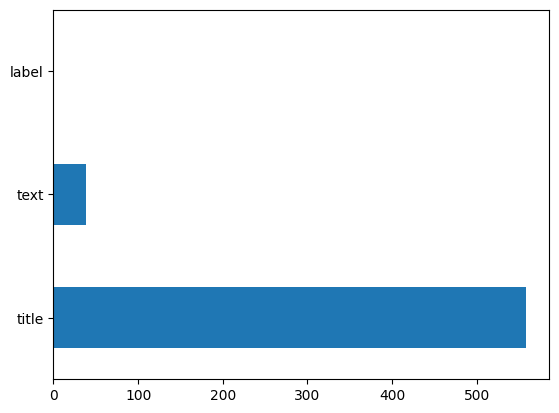

In [ ]:
df.isnull().sum().plot(kind="barh")
plt.show()

<div style = "height: 210px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               ">
        <b>Observations:</b>
        
 <p>
     <ol>
         <li>There are a total of 4 columns and 72134 rows in the data</li>
         <li>Label is the target variable</li>
         <li>Percentage of Real and fake News articles:<ul><li>real : 51%</li><li>fake :49%</li></ul></li>
         <li>Missing values are present in the dataset</li>
    </ol>
 </p>
    </h3>

</div>

In [ ]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [ ]:
df = df.fillna('')

In [ ]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [ ]:
df.nunique()

title    62348
text     62719
label        2
dtype: int64

In [ ]:
df["title_text"] = df["title"] + df["text"]
df["body_len"] = df["title_text"].apply(lambda x: len(x) - x.count(" "))
df.head()

,title,text,label,title_text,body_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?,39
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668


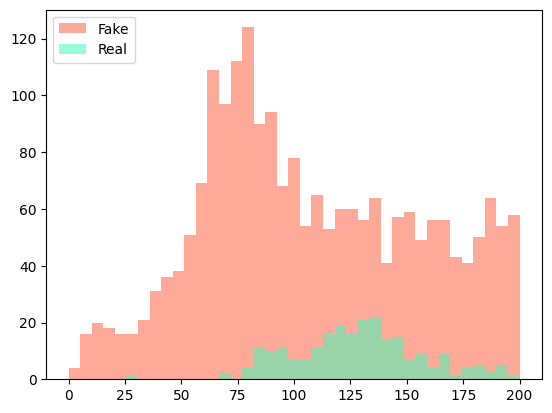

In [ ]:
bins = np.linspace(0, 200, 40)

plt.hist(df[df["label"]== 1]["body_len"], bins, alpha=0.5, label="Fake", color="#FF5733")
plt.hist(df[df["label"]== 0]["body_len"], bins, alpha=0.5, label="Real", color="#33FFB8")
plt.legend(loc="upper left")
plt.show()

<div style = "height: 150px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="padding: 10px;
              color:black;
               ">
        <b>Insights :</b>
        <br></br>
       
 <i>Fake news seem to be quite a bit longer than real news.</i>
    </h3>

</div>

Text(0.5, 1.0, 'Distribution of Fake/Real News')

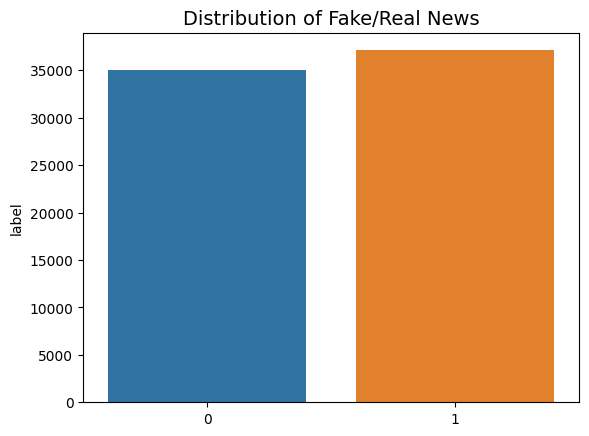

In [ ]:
class_names = ['fake', 'real']
label_count = df.label.value_counts()
sns.barplot(x=label_count.index, y=label_count)
plt.title('Distribution of Fake/Real News',fontsize =14)

In [ ]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: label, dtype: int64

In [ ]:
df.tail()

,title,text,label,title_text,body_len
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,Russians steal research on Trump in hack of U....,4098
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,WATCH: Giuliani Demands That Democrats Apolog...,3092
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,Migrants Refuse To Leave Train At Refugee Camp...,2447
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0,Trump tussle gives unpopular Mexican leader mu...,2868
72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1,Goldman Sachs Endorses Hillary Clinton For Pre...,2311


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['title_text'], y, test_size=0.33, random_state=53)

<div id = "nt"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.2 Data Visualization of all News Titles
    </h3>

</div>

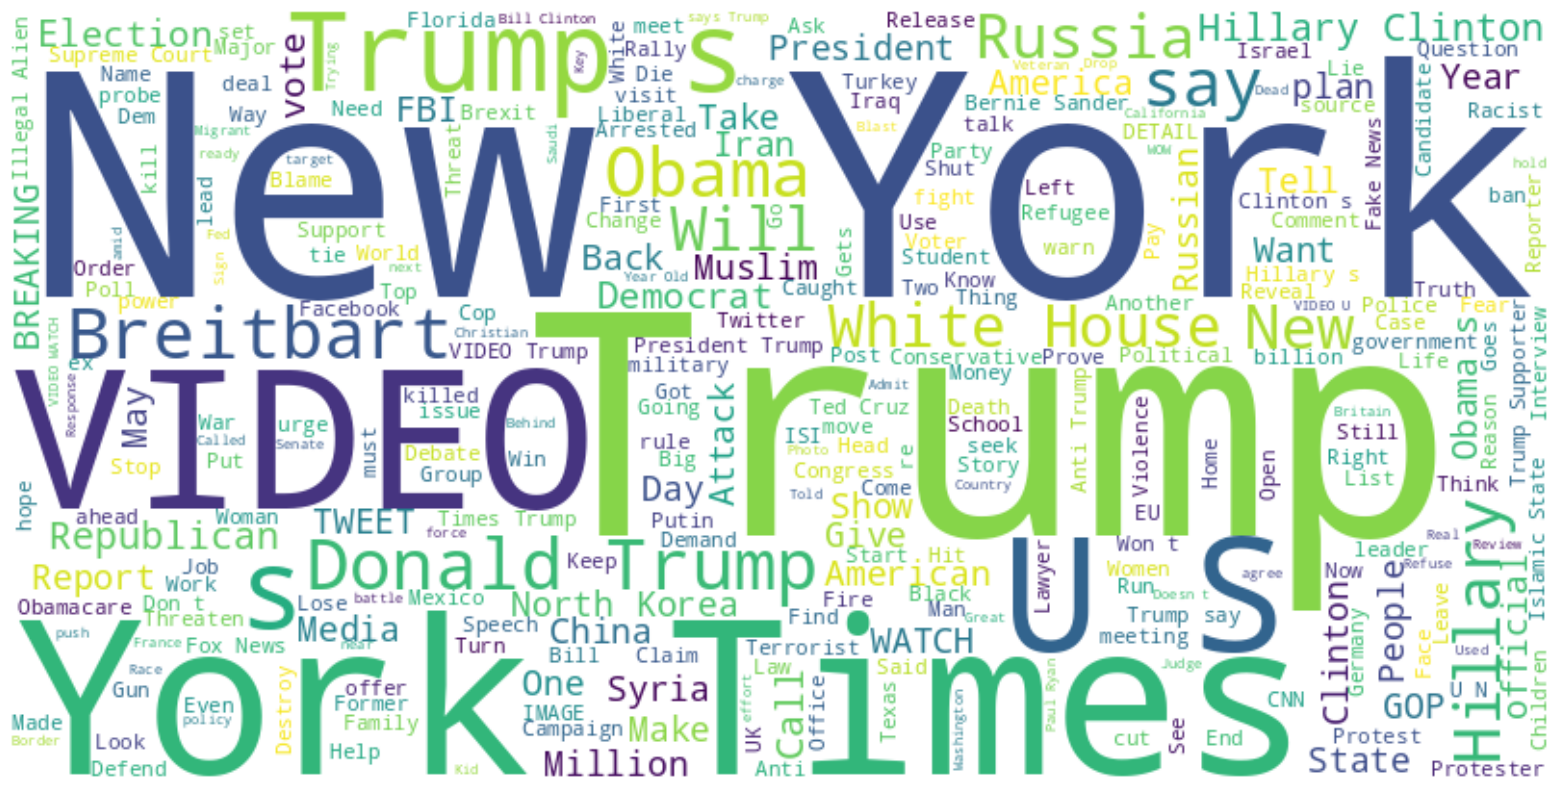

In [ ]:

titles = ' '.join(title for title in df['title'])
wordcloud = WordCloud(
    background_color='white',
    max_words=300,
    width=800,
    height=400,
).generate(titles)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div style = "height: 110px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               ">
        <b>Quick Insights:</b>
        
 <p>
     <ul>
         <li>many of available news articles are about elections and presidents of USA </li>
    </ul>
 </p>
    </h3>

</div>

<div id = "ft"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.3 Data Visualization of texts in fake news
    </h3>

</div>

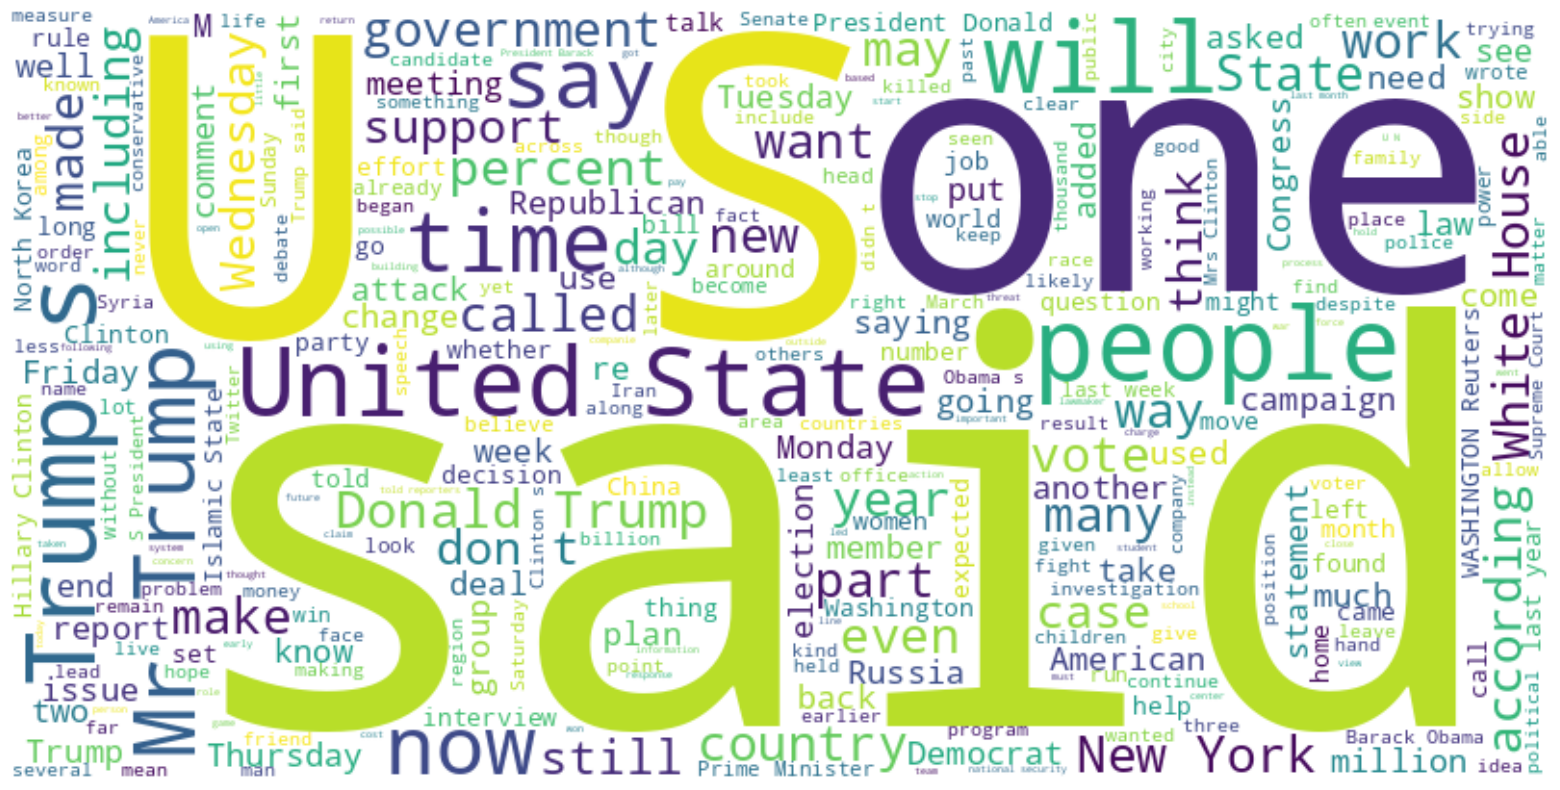

In [ ]:
fake_news = X_train[y_train == 0]
real_news = X_train[y_train == 1]
fake_texts = ' '.join(text for text in fake_news)
wordcloud = WordCloud(
    background_color='white',
    max_words=300,
    width=800,
    height=400,
).generate(fake_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div id = "rt"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       1.4 Data Visualization of texts in Real news
    </h3>

</div>

<function matplotlib.pyplot.show(close=None, block=None)>

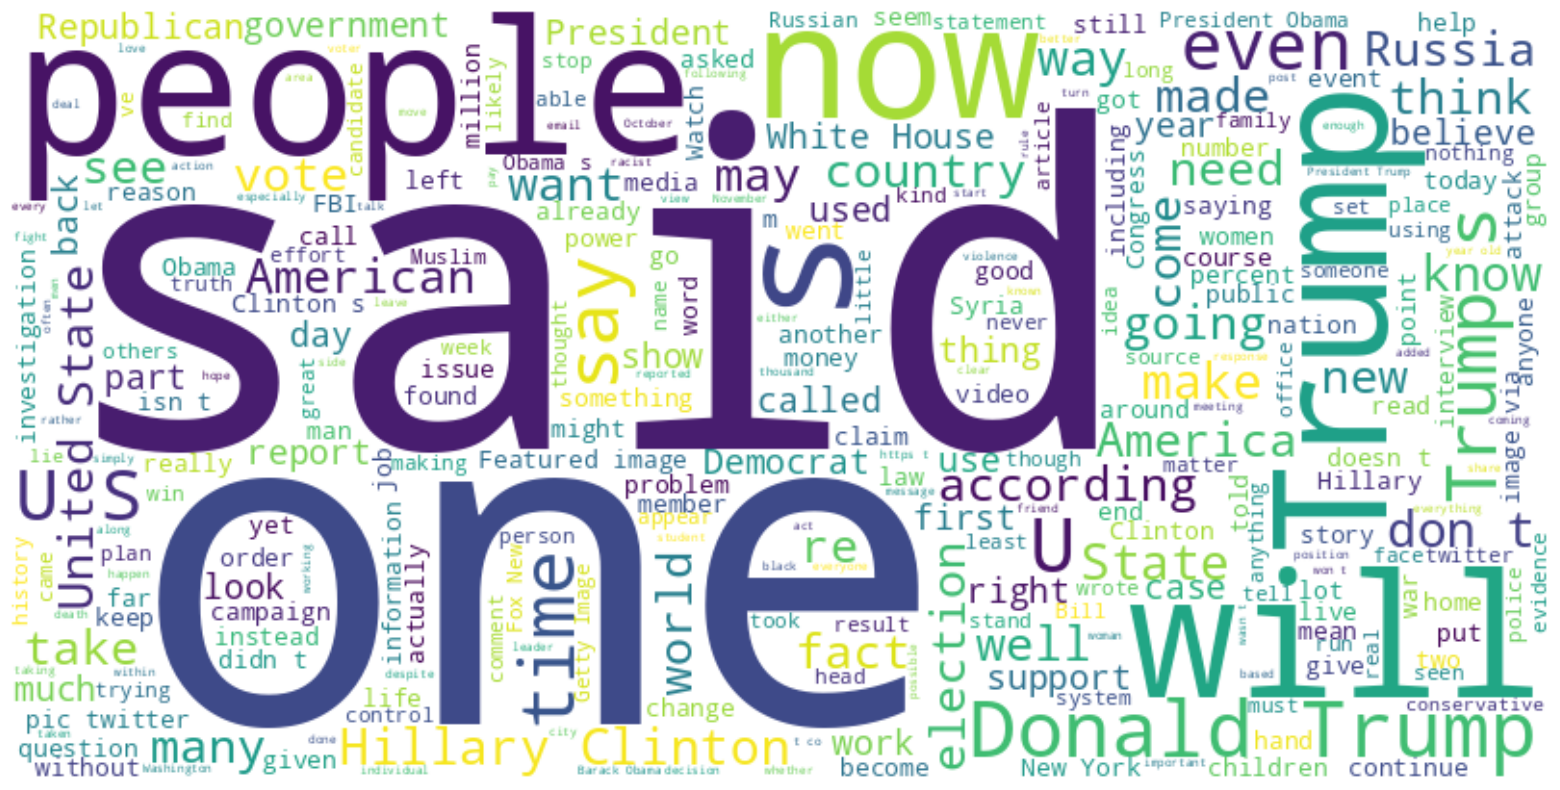

In [ ]:
real_texts = ' '.join(text for text in real_news)
wordcloud = WordCloud(
    background_color='white',
    max_words=300,
    width=800,
    height=400,
).generate(real_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

<!-- # EDA -->
<div id = "bm"style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>2.Bag of Words Model</b>
    </h1>

</div>

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)


In [ ]:
import pickle
pickle.dump(count_vectorizer, open("count_vect_title_text.pkl", "wb"))

<!-- # EDA -->
<div id = "nb"style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>3.Training Naive Bayes Model</b>
    </h1>

</div>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)


MultinomialNB()

<div id = "p1"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       3.1 Predictions on NB model
    </h3>

</div>

In [ ]:
count_test = count_vectorizer.transform(["WASHINGTON (Reuters) - U.S. President Donald Trump sent a Twitter message bragging about corporate America’s high profits under his presidency on Tuesday, prompting critics to say he was undercutting Republican arguments in favor of a tax cut for corporations. As Republicans in Washington try to refocus on taxes after the collapse of their failed drive to repeal Obamacare, Trump sent a morning tweet that said: “Corporations have NEVER made as much money as they are making now.” Corporate lobbyists and Republicans consistently argue that a cut in the corporate income tax is needed to help corporations be more competitive. But highlighting corporate profits could diminish that argument. “This is a weird way to launch their proposal to cut corporate taxes,” Democratic Senator Brian Schatz said in a tweet of his own responding to Trump. The largest U.S. public companies have seen profits accelerate in 2017, with quarterly earnings rising at a double-digit pace compared with a year ago, according to Thomson Reuters data. Full-year earnings are expected to be up 11.5 percent, which would be the strongest growth since 2011. More than six months into his presidency, Trump still sends out tweets that catch aides and allies off guard and sometimes clash with Republicans’ messaging on their policy agenda. The Trump tweet “takes the edge of urgency off the plea to reduce the burden on corporations,” said William Galston, a senior fellow at the Brookings Institution think tank. Trump later took credit for surging U.S. stock prices that pushed the Dow Jones Industrial Average to a new record high on Tuesday. But the broader market saw a bigger rally under former President Barack Obama. The benchmark S&P 500 Index has gained 9.4 percent since Trump took office on Jan. 20, lagging a 16.2 percent S&P gain during Obama’s first months in office. Senate Republican leader Mitch McConnell said on Tuesday that Congress would take up tax reform after the U.S. Labor Day holiday on Sept. 4, beginning in the House of Representatives. A White House timeline envisions a House vote on tax legislation in October and Senate vote in November.  But there is little consensus on the issue. The White House insists on cutting the corporate rate to 15 percent, while House Republicans favor 20 percent. A top Senate Republican this week said lawmakers would be lucky to get it down to 25 percent.   On Tuesday, Senate Democrats offered to work with Republicans on a bipartisan tax package, but only if it does not cut taxes for the wealthy, add to the federal deficit or allow Republicans to enact legislation on their own. But McConnell rejected the offer from 45 lawmakers led by Senate Democratic leader Chuck Schumer. “Most of the principles that would get the country growing again, they’re not interested in addressing,” the Kentucky Republican told reporters.  McConnell said he hoped Republican legislation might win support from three Senate Democrats who face reelection next year in Republican states and did not join the offer from other Democrats. "])

In [ ]:
pred = nb_classifier.predict(count_test)

In [ ]:
pred

array([0])

In [ ]:
pickle.dump(nb_classifier, open("nb_model_title_text.pkl", "wb"))

In [ ]:
my_model = pickle.load(open("nb_model.pkl", "rb"))

In [ ]:
count_vectorizer2 = CountVectorizer(stop_words='english')
count_train = count_vectorizer2.fit_transform(X_train)


In [ ]:
pickle.dump(count_vectorizer2, open("vectorizer_model.pkl", "wb"))

<div id = "e1"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       3.2 Evaluation of NB predictions
    </h3>

</div>

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11640
           1       0.91      0.87      0.89     12165

    accuracy                           0.89     23805
   macro avg       0.89      0.89      0.89     23805
weighted avg       0.89      0.89      0.89     23805



<div style = "height: 65px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               text-align: center;
               ">
        <i><b>Accuracy achieved using Naive Bayes Model : 89%</b></i>
    </h3>

</div>

<div id = "cm1"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       3.3 Confusion Matrix
    </h3>

</div>

Text(70.72222222222221, 0.5, 'Real Labels')

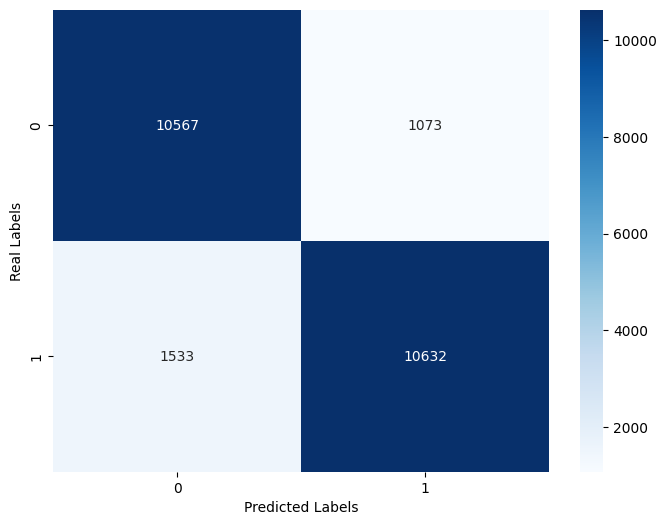

In [ ]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

<!-- # EDA -->
<div id = "rm" style = "height: 50px;
  width: 800px;
  background-color: #813EEC;">
    <h1 style="padding: 10px;
              color:white;">
        <b>4.Training Random Forest Model</b>
    </h1>

</div>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300)
model.fit(count_train, y_train)


RandomForestClassifier(n_estimators=300)

<div id = "p2"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       4.1 Predictions on Random Forest Classifier
    </h3>

</div>

In [ ]:
pred2 = model.predict(count_test)

In [ ]:
count_test

<23805x196520 sparse matrix of type '<class 'numpy.int64'>'
	with 4534257 stored elements in Compressed Sparse Row format>

<div id = "e2"style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       4.2 Evaluation of RF Classifier Predictions
    </h3>

</div>

In [ ]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     11640
           1       0.93      0.94      0.94     12165

    accuracy                           0.94     23805
   macro avg       0.94      0.94      0.94     23805
weighted avg       0.94      0.94      0.94     23805



<div style = "height: 65px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               text-align: center;
               ">
        <i><b>Accuracy achieved using Random Forest Model : 94%</b></i>
    </h3>

</div>

<div id = "cm2" style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px;
              color:black;">
       4.3 Confusion Matrix
    </h3>

</div>

Text(70.72222222222221, 0.5, 'Real Labels')

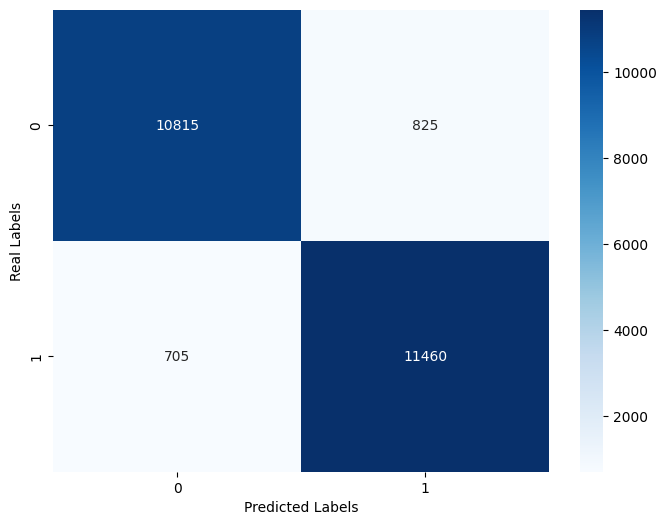

In [ ]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred2), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

<div id = "cm2" style = "height: 50px;
  width: 800px;
  background-color: #00f349;">
    <h3 style="padding: 10px; color:black;">
       4.4 Saving Model
    </h3>

</div>

In [ ]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(model,f)